In [1]:
import xml.etree.ElementTree as ET
import os
import glob

In [2]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow_datasets as tfds

import copy
import cv2
from PIL import Image, ImageDraw

In [3]:
path1 = '/home/ssac26/hackerton3/datapreprocess'

In [4]:
foldername = 'Bbox_0003'

In [5]:
filename = '0617_04.xml'

In [6]:
finalpath = os.path.join(path1, filename)

In [7]:
finalpath

'/home/ssac26/hackerton3/datapreprocess/0617_04.xml'

In [8]:
pwd

'/home/ssac26/hackerton3/datapreprocess'

In [9]:
# 파일 순서대로 읽기
def getimgdir(dir_path):
    image_list = []
    for i in glob.glob(dir_path + '/*.jpg'):
        image_list.append(i)
    
    return image_list

In [10]:
# custom annotation format to yolov4
def convert(box, size):
    dw = 1./(size[0]) 
    dh = 1./(size[1])
    x = (box[0] + box[2])/2.0
    y = (box[1] + box[3])/2.0
    w = box[2] - box[0]
    h = box[3] - box[1]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)
    

* xml file parsing

In [11]:
doc = ET.parse(finalpath)
root = doc.getroot()

In [12]:
aa = root.findall('./image')

In [13]:
for i in root.iter('image'):
    namebox = []
    #print(i.attrib['name'])
    for j in i.iter('box'):
        if j.attrib['label']=='person':
            #with open(i.attrib['name'] +  '.txt', 'w') as w_file:
               # w_file.write(j.attrib.text)
            print(i.attrib['name'])
            bbox_x1 = float(j.attrib['xtl'])
            bbox_y1 = float(j.attrib['ytl'])
            bbox_x2 = float(j.attrib['xbr'])
            bbox_y2 = float(j.attrib['ybr'])
            print(convert([bbox_x1, bbox_y1, bbox_x2, bbox_y2],(1920,1080)))
            
        #else:
           # continue

        
# yolo labeling format으로 바꿔서 txt로 저장, 중복되는 파일명 제거 (set?)
# jpg가 파일명에 같이저장되는 문제해결 필요

MP_SEL_000601.jpg
(0.5303828125, 0.03324074074074074, 0.010359374999999994, 0.05844444444444444)
MP_SEL_000615.jpg
(0.47010677083333335, 0.3562824074074074, 0.011015624999999987, 0.05508333333333329)
MP_SEL_000616.jpg
(0.05078125, 0.31199074074074074, 0.0265625, 0.13138888888888886)
MP_SEL_000616.jpg
(0.027083333333333334, 0.3105092592592593, 0.026041666666666668, 0.1525)
MP_SEL_000616.jpg
(0.03588541666666667, 0.33907407407407414, 0.023020833333333334, 0.06833333333333334)
MP_SEL_000625.jpg
(0.30056770833333335, 0.31533333333333335, 0.02137499999999998, 0.046481481481481526)
MP_SEL_000636.jpg
(0.920859375, 0.2314351851851852, 0.06578124999999997, 0.08694444444444442)
MP_SEL_000637.jpg
(0.04513020833333334, 0.39569444444444446, 0.027552083333333328, 0.09805555555555559)
MP_SEL_000637.jpg
(0.017057291666666665, 0.4043518518518519, 0.016614583333333335, 0.07333333333333332)
MP_SEL_000637.jpg
(0.18369531249999999, 0.3903888888888889, 0.024890624999999982, 0.08398148148148153)
MP_SEL_00064

* bbox가 제대로 생성됬나 확인

In [14]:
# yolo format된 좌표
object_bbox = [0.5303828125, 0.03324074074074074, 0.010359374999999994, 0.05844444444444444]

In [24]:
# xml상의 좌표
test2 = [1008.39, 4.34,1028.28, 67.46]

In [16]:
input_image = os.path.join(path1,'MP_SEL_000601.jpg')

In [17]:
input_image

'/home/ssac26/hackerton3/datapreprocess/MP_SEL_000601.jpg'

In [18]:
# # convert tensor 
# proto_tensor2 = tf.make_tensor_proto(test2)
# proto2 = tf.make_ndarray(proto_tensor2)

In [25]:
def draw_bbox(image,object_bbox):
    image =Image.open(image)
    width, height = image.size
    image_copy = copy.deepcopy(image)
    draw = ImageDraw.Draw(image_copy) # image_1을 수정
    
    xmin = object_bbox[0] 
    ymin = object_bbox[1] 
    xmax = object_bbox[2] 
    ymax = object_bbox[3] 
       
    draw.rectangle([xmin,ymin,xmax,ymax], outline=(0, 0, 255), width=2)
      
    return image_copy

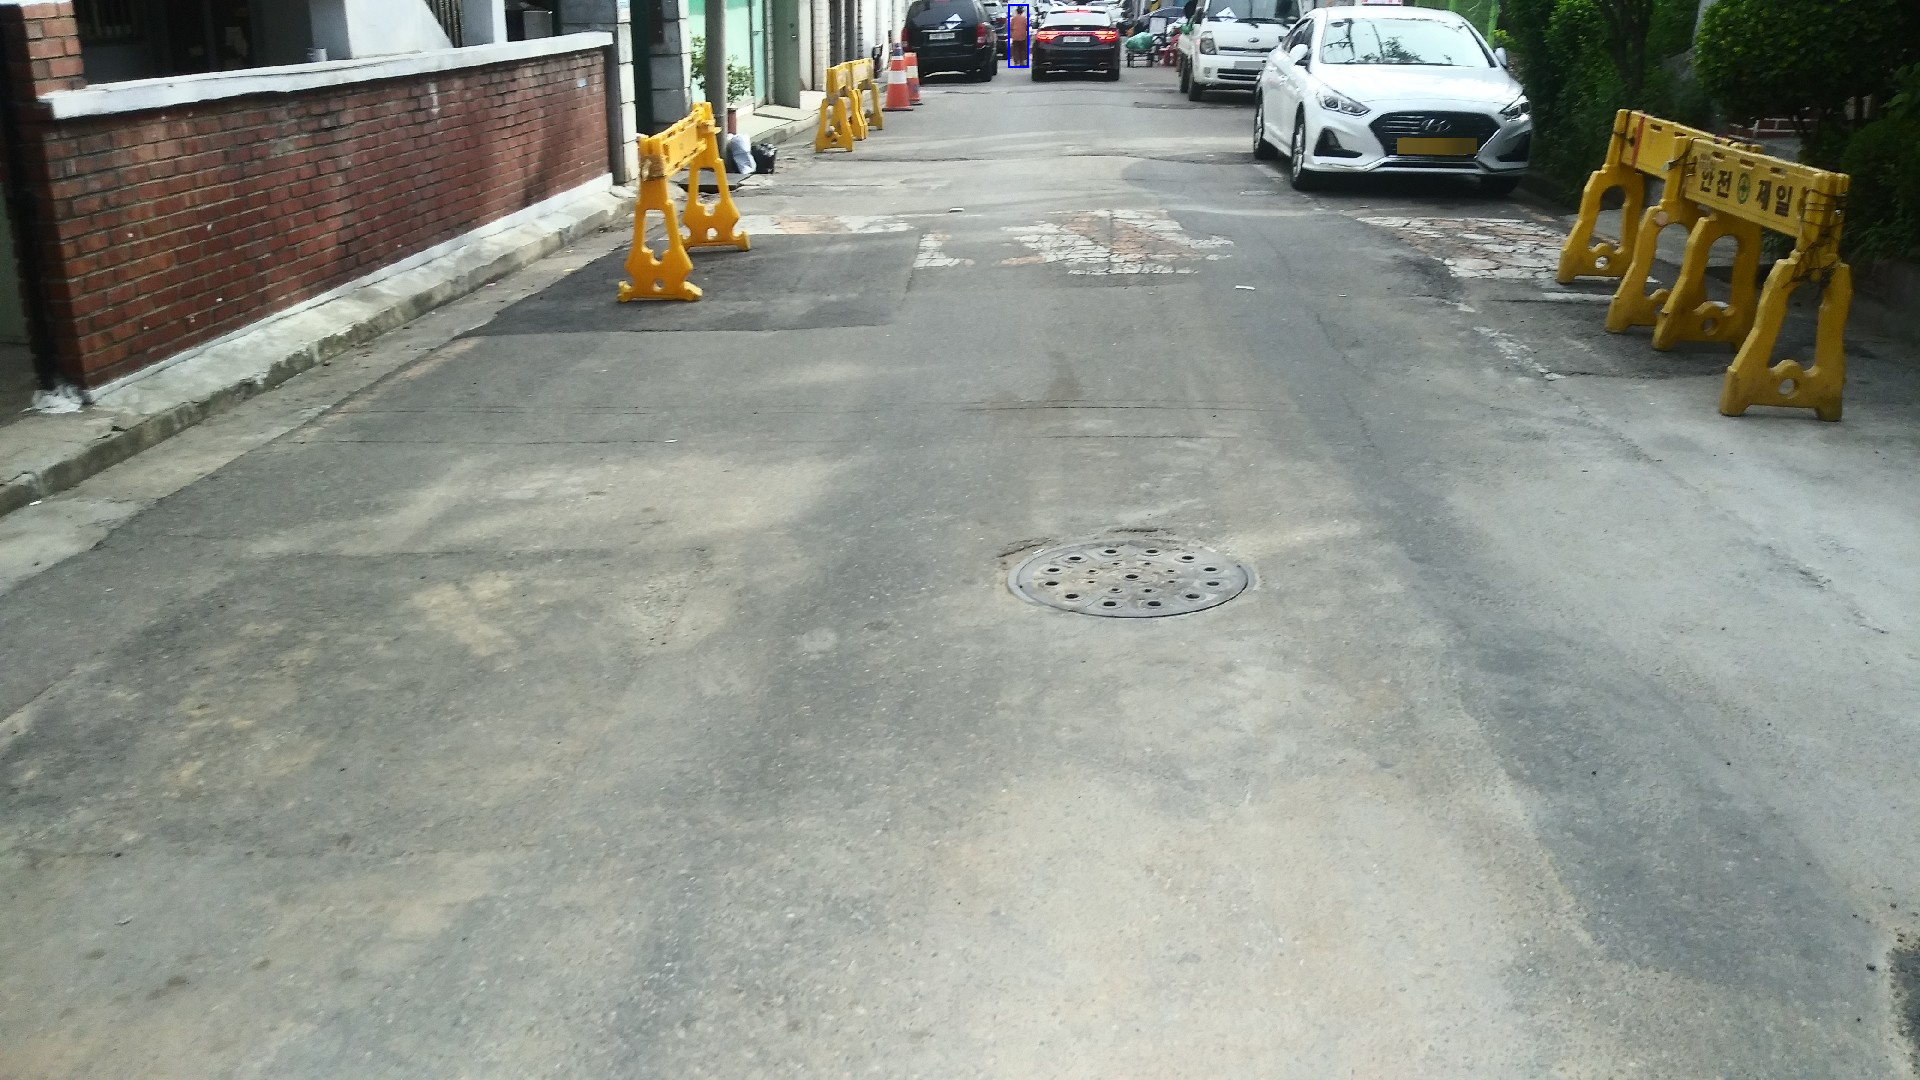

In [26]:
draw_bbox(input_image, test2)

In [29]:
def draw_bbox_yolo(image,object_bbox):
    image =Image.open(image)
    width, height = image.size
    image_copy = copy.deepcopy(image)
    draw = ImageDraw.Draw(image_copy) # image_1을 수정
    # object_bbox : yolo format annotation without labeling
    x = object_bbox[0] * width
    y = object_bbox[1] * height
    w = object_bbox[2] * width
    h = object_bbox[3] * height
       
    draw.rectangle([(x,y),(x+w,y+h)], outline=(0, 0, 255), width=2)
      
    return image_copy

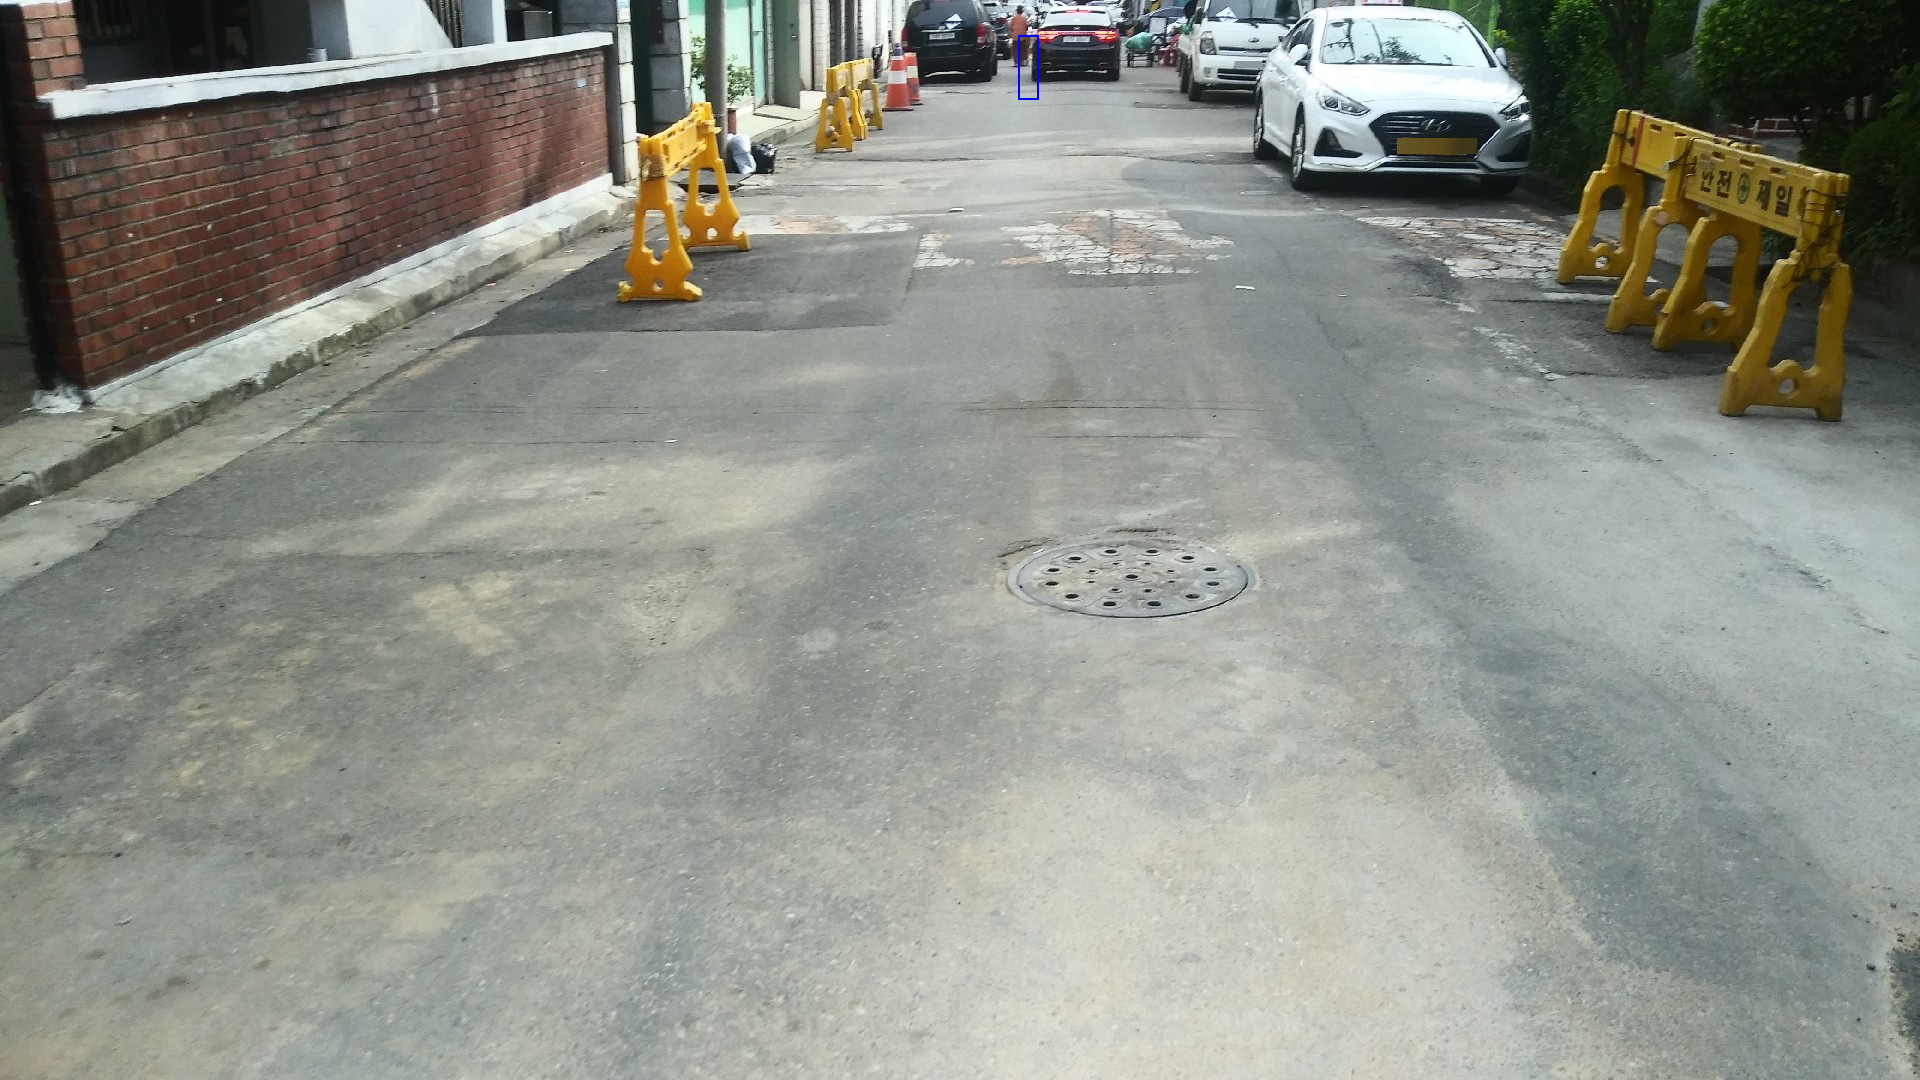

In [30]:
draw_bbox_yolo(input_image, object_bbox)

In [ ]:
# input_image = copy.deepcopy(img)
# draw = ImageDraw.Draw(input_image)
# rects =([proto2[:,0], proto2[:,1], proto2[:,2], proto2[:,3]])
# draw.rectangle(rects, outline=(255,0,0), width=2)


In [ ]:
#visualize_bbox(input_image, object_bbox)